<a href="https://colab.research.google.com/github/Patojukarthikeya73/Infosys_Springboard/blob/main/Module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Libraries Required**

Gradio is used to build the web-based interface within Google Colab.

JWT (JSON Web Token) manages secure login sessions using encoded tokens.

Datetime is used to control token expiration time.

Bcrypt handles password encryption and verification for security.



In [ ]:
!pip install gradio streamlit pyngrok matplotlib pandas scikit-learn bcrypt transformers --quiet

**Defining Security Keys and Database**

Purpose:
To define a secret key for encryption and a structure for storing user information.

Details:

A secret key is used to sign JWT tokens so that they cannot be forged.

A temporary in-memory database (dictionary) is used to store user credentials, roles, and preferences

In [ ]:
import gradio as gr
import jwt, datetime, bcrypt

SECRET_KEY = "your-secret-key"
users_db = {}   # username -> {password, role, preference}

# --- JWT helpers ---
def create_token(username):
    payload = {
        "username": username,
        "exp": datetime.datetime.utcnow() + datetime.timedelta(hours=1)
    }
    return jwt.encode(payload, SECRET_KEY, algorithm="HS256")

def verify_token(token):
    try:
        decoded = jwt.decode(token, SECRET_KEY, algorithms=["HS256"])
        return decoded["username"]
    except Exception:
        return None


# --- Core Logic ---
def register_user(username, password, role, preference):
    if username in users_db:
        return "⚠️ Username already exists."
    hashed = bcrypt.hashpw(password.encode(), bcrypt.gensalt())
    users_db[username] = {"password": hashed, "role": role, "pref": preference}
    return f"✅ User '{username}' registered successfully!"

def login_user(username, password):
    user = users_db.get(username)
    if not user:
        return "❌ Invalid username or password.", None
    if not bcrypt.checkpw(password.encode(), user["password"]):
        return "❌ Invalid username or password.", None
    token = create_token(username)
    return f"✅ Welcome {username}! (role: {user['role']})", token

def dashboard(token):
    username = verify_token(token)
    if not username:
        return "⚠️ Invalid or expired token. Please login again."
    user = users_db[username]
    return f"""
👋 **Welcome, {username}!**
- Role: **{user['role']}**
- Content Preference: **{user['pref']}**

You can now access personalized content or update your profile.
"""

# --- Gradio Interface ---

with gr.Blocks(title="Milestone 3 – Module 1 (Gradio JWT App)") as demo:
    gr.Markdown("##  Secure Login System ")

    with gr.Tab("📝 Register"):
        r_user = gr.Textbox(label="Username")
        r_pass = gr.Textbox(label="Password", type="password")
        r_role = gr.Dropdown(["Reader", "Admin"], label="Role", value="Reader")
        r_pref = gr.Textbox(label="Reading Preference / Content Type")
        r_btn = gr.Button("Register")
        r_out = gr.Textbox(label="Result")
        r_btn.click(register_user, inputs=[r_user, r_pass, r_role, r_pref], outputs=r_out)

    with gr.Tab("🔑 Login"):
        l_user = gr.Textbox(label="Username")
        l_pass = gr.Textbox(label="Password", type="password")
        l_btn = gr.Button("Login")
        l_msg = gr.Textbox(label="Message")
        l_token = gr.Textbox(label="JWT Token (copy for Dashboard)")
        l_btn.click(login_user, inputs=[l_user, l_pass], outputs=[l_msg, l_token])

    with gr.Tab("📊 Dashboard"):
        token_in = gr.Textbox(label="Paste your JWT Token")
        d_btn = gr.Button("Show Dashboard")
        d_out = gr.Markdown()
        d_btn.click(dashboard, inputs=token_in, outputs=d_out)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://25871bcae936da4244.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


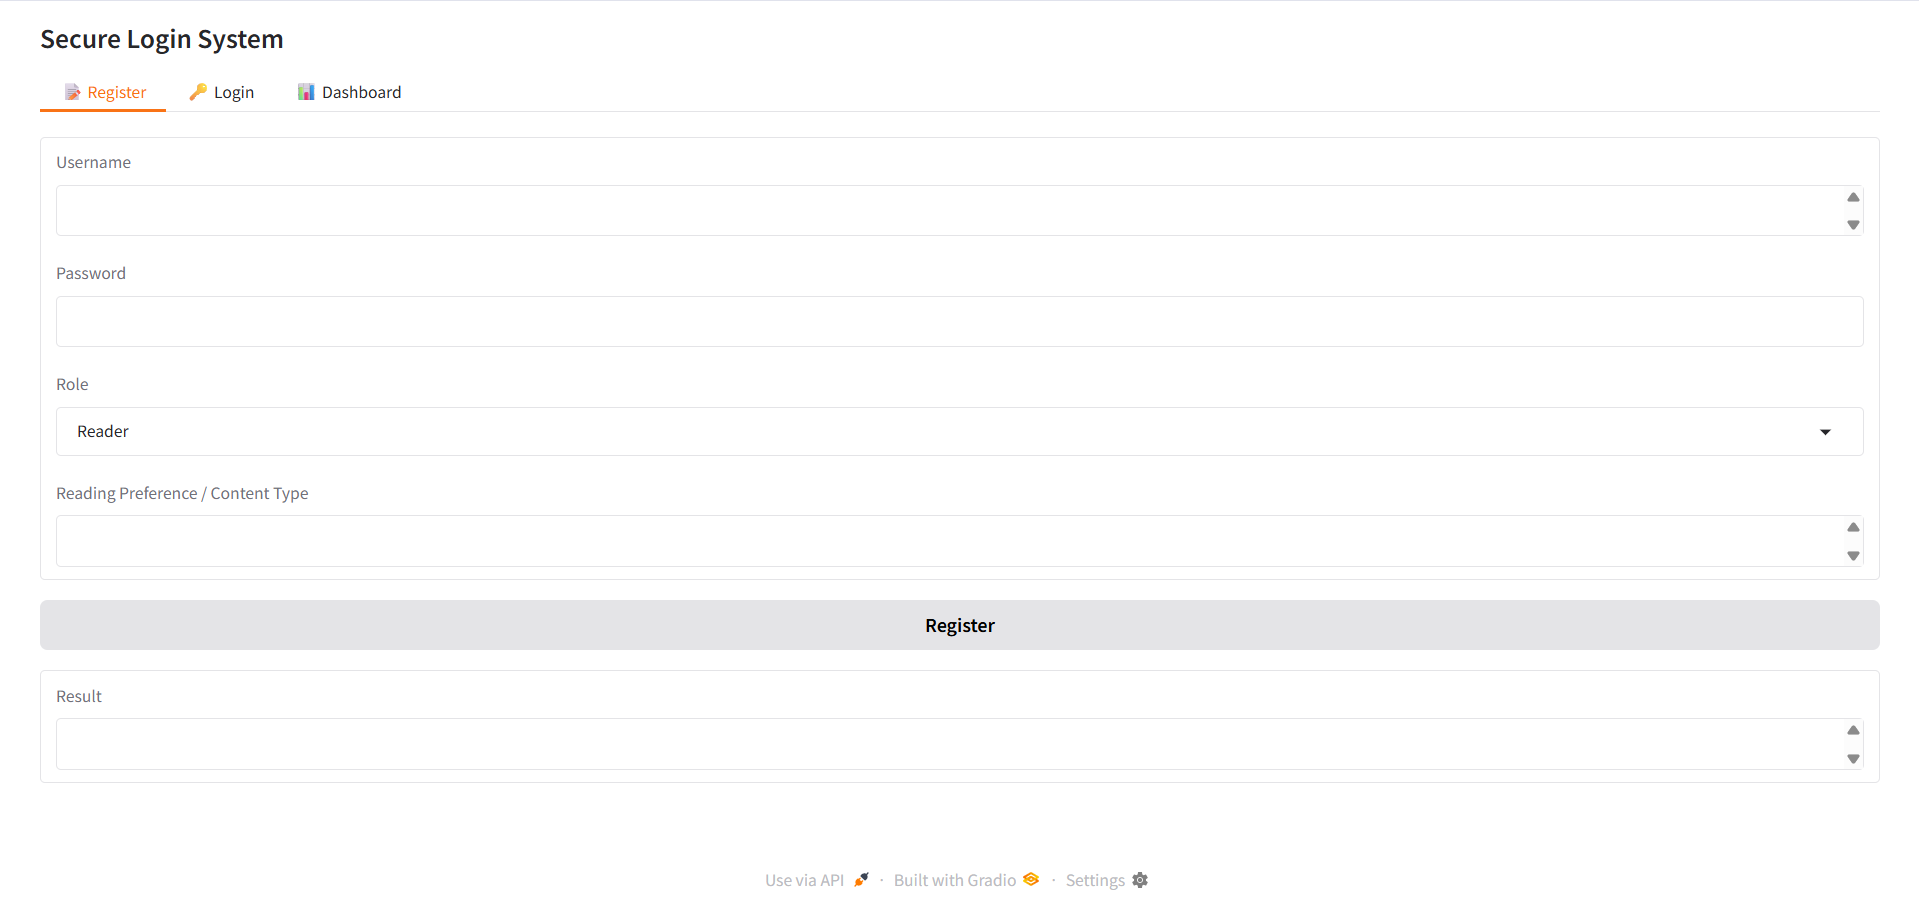

**Token Management (JWT Handling)**

Purpose:
To securely manage user sessions using tokens instead of traditional cookies.

Details:

When a user logs in, a JWT token is generated containing their username and an expiration time.

The token is later used to verify whether a user is authorized to access certain features.

If the token is expired or invalid, the user must log in again.

In [ ]:
def update_profile(email, role=None, reading_preferences=None, content_type=None):
    if email not in users_db:
        return {"error": "User not found"}

    if role:
        users_db[email]["role"] = role
    if reading_preferences:
        users_db[email]["reading_preferences"] = reading_preferences
    if content_type:
        users_db[email]["content_type"] = content_type

    return {"message": "Profile updated successfully!", "user": users_db[email]}


**User Registration Process**
**Role and** **Profile Management**

*Purpose* :

To handle different types of users and their content preferences.

To allow new users to sign up securely with defined roles and preferences.

*Details:*

Each user has a role that defines their permissions (e.g., Admins might manage content; Readers might only view).

Preferences (like topic or category) can be stored to personalize their experience later.

Roles and preferences are displayed on the user’s dashboard.

To allow new users to sign up securely with defined roles and preferences.

When a user registers, their password is encrypted using bcrypt before storing.

Duplicate usernames are prevented.

Each user can set a role (e.g., Reader, Admin) and preference (e.g., content type).

In [ ]:
import gradio as gr

roles = ["admin", "editor", "viewer"]
topics = ["AI", "Machine Learning", "Data Science", "Finance"]
content_types = ["Articles", "Videos", "Research Papers"]

def profile_ui(email, role, reading_preferences, content_type):
    return update_profile(email, role, reading_preferences, content_type)

with gr.Blocks() as demo:
    gr.Markdown("### 🧑‍💼 User Role & Profile Management")
    email = gr.Textbox(label="User Email")
    role = gr.Dropdown(choices=roles, label="Select Role")
    reading_preferences = gr.CheckboxGroup(choices=topics, label="Reading Preferences")
    content_type = gr.CheckboxGroup(choices=content_types, label="Preferred Content Types")
    output = gr.JSON(label="Result")

    submit_btn = gr.Button("Update Profile")
    submit_btn.click(profile_ui, inputs=[email, role, reading_preferences, content_type], outputs=output)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f334c386c0588c18db.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


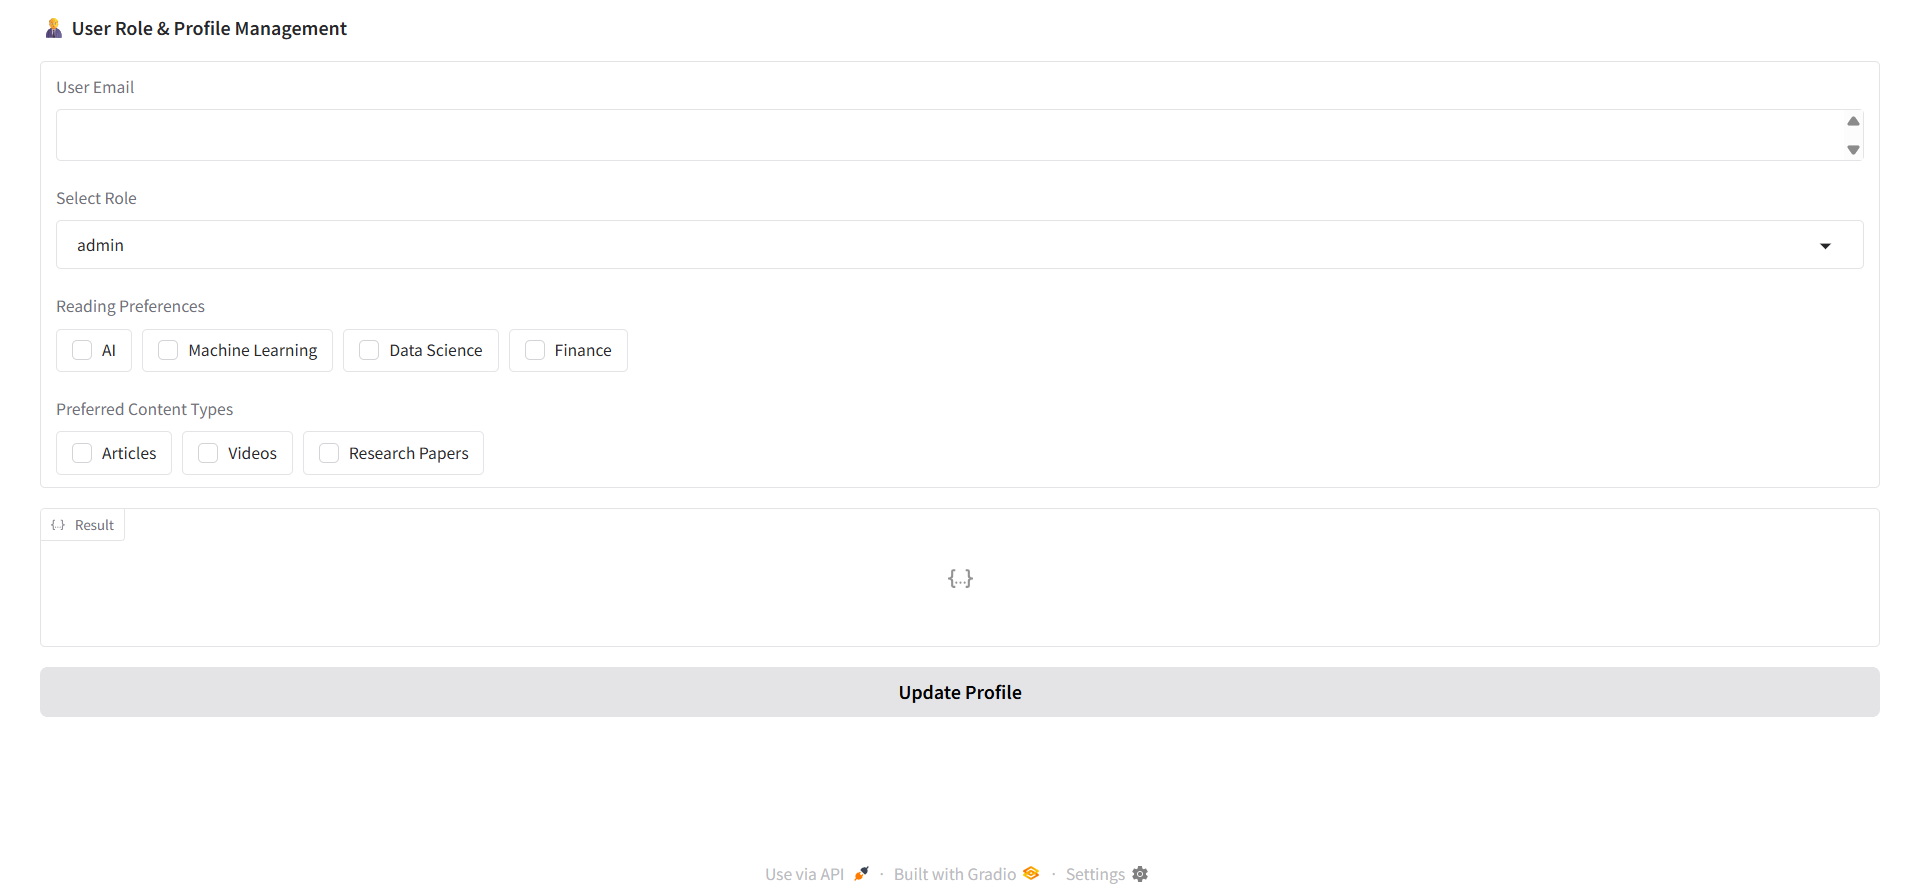

**Designing the Minimal Web Interface (Gradio)**

Purpose:

To allow users to interact with the authentication system easily.
\
Details:

The interface has three tabs: Register, Login, and Dashboard.

Each tab corresponds to one major function of the system.

Inputs and buttons connect the user’s actions directly with backend logic.

The interface runs on Google Colab and provides a shareable link for public testing.

| Feature               | Description                                           |
| --------------------- | ----------------------------------------------------- |
| Secure Authentication | Implemented password encryption and token-based login |
| Role Management       | User roles like Admin and Reader defined              |
| Profile Preferences   | Personalized content setup included                   |
| Minimal Web UI        | Built using Gradio for quick testing in Colab         |
| JWT Session Handling  | Secure login persistence with expiry                  |
| Expandability         | Ready for future modules and integration              |
